In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import bnl
import random

In [60]:
tids = bnl.fio.salami_tids()
tid = random.choice(tids)
print(tid)
refs, ests = bnl.fio.salami_annos(tid)
refs = iter(refs.values())

1101


In [61]:
ref = next(refs).unique_labeling()
for est in ests.values():
    scores = bnl.mtr.bmeasure(ref.itvls, est.itvls, trim=False, window=3)
    scores.loc['t'] = bnl.mtr.lmeasure(ref.itvls, ref.labels, est.itvls, est.labels)
    print(scores)

    b_comp = bnl.mtr.bmeasure_components(ref.itvls, est.itvls, trim=False, window=3)
    print(b_comp)

        prec    recall        f1
hr  0.544444  0.662162  0.597561
sr  0.165125  0.245098  0.197316
b   0.253398  0.357769  0.296671
t   0.164399  0.774641  0.271234
      cap  est  ref
beta   49   90   74
pi    125  757  510
        prec    recall        f1
hr  0.641026  0.675676  0.657895
sr  0.278313  0.458333  0.346327
b   0.388118  0.546177  0.453778
t   0.188355  0.784987  0.303812
      cap  est  ref
beta   50   78   74
pi    231  830  504
        prec    recall        f1
hr  0.661538  0.581081  0.618705
sr  0.303759  0.573864  0.397247
b   0.416345  0.577450  0.483839
t   0.169966  0.807120  0.280801
      cap  est  ref
beta   43   65   74
pi    202  665  352


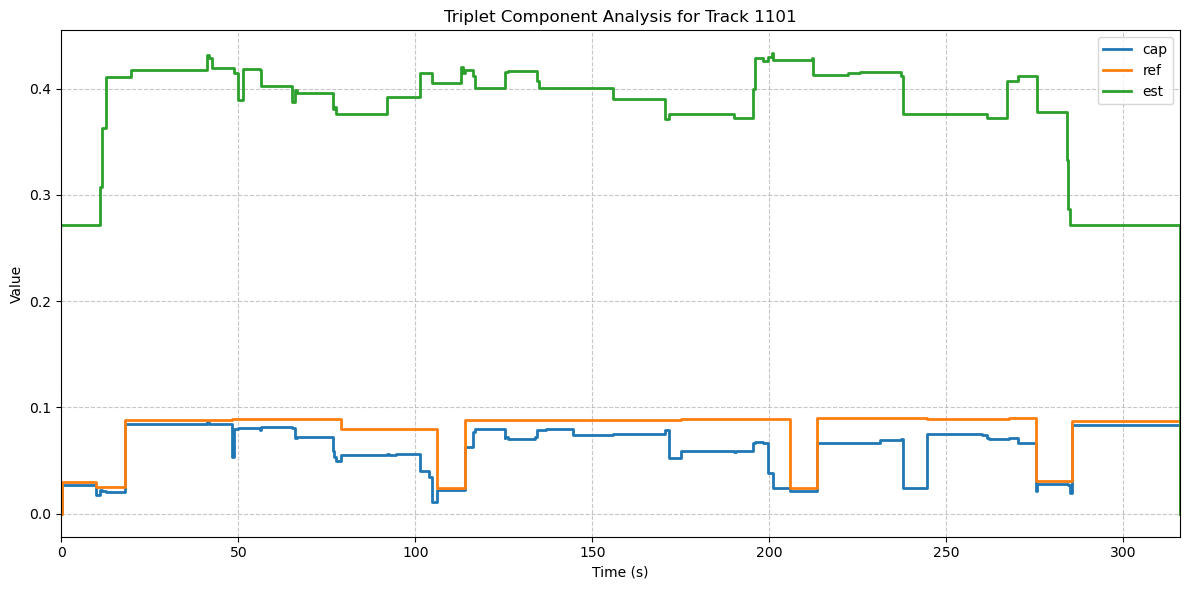

In [62]:
import matplotlib.pyplot as plt
import numpy as np
t_comp = bnl.mtr.triplet_components(ref.itvls, ref.labels, est.itvls, est.labels)
# Calculate time points for the steps
time_points = np.cumsum(t_comp['dur'])
time_points = np.insert(time_points, 0, 0)  # Add starting point at 0

# Repeat the last cap, ref, and est values for step plot end
cap_vals = np.append(t_comp['cap'].values, t_comp['cap'].values[-1])
ref_vals = np.append(t_comp['ref'].values, t_comp['ref'].values[-1])
est_vals = np.append(t_comp['est'].values, t_comp['est'].values[-1])

# Plot step functions for cap, ref, and est
plt.figure(figsize=(12, 6))
plt.step(time_points, cap_vals, where='post', label='cap', linewidth=2)
plt.step(time_points, ref_vals, where='post', label='ref', linewidth=2)
plt.step(time_points, est_vals, where='post', label='est', linewidth=2)

# Add labels and title
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.title(f'Triplet Component Analysis for Track {tid}')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Calculate max time for proper display
max_time = time_points[-1]
plt.xlim(0, max_time)

plt.tight_layout()
plt.show()

(<Figure size 500x530 with 12 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: xlabel='Time (s)'>], dtype=object))

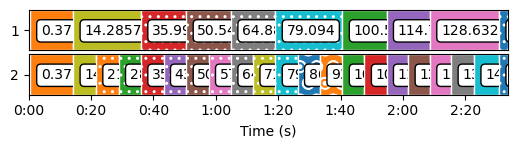

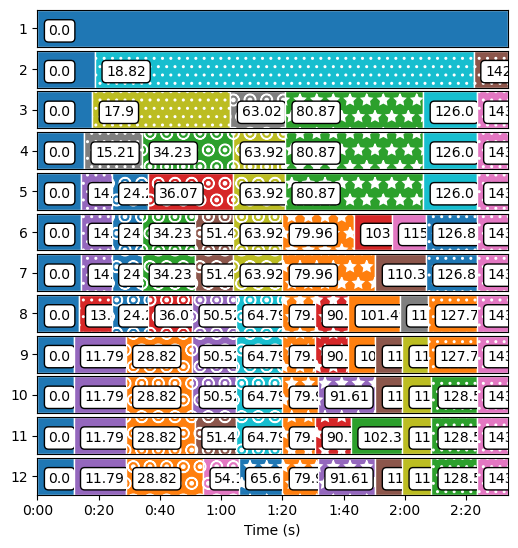

In [47]:
ref.plot()
est.plot()

In [133]:
ref_triplets

array([0.31597074, 0.31597074, 0.31597074, 0.31597074, 0.31597074,
       0.32527887, 0.33798985, 0.27307884, 0.27307884, 0.27383506,
       0.27383506, 0.27205618, 0.36425354, 0.35636537, 0.35636537,
       0.3452629 , 0.3452629 , 0.3452629 , 0.3455617 , 0.34531646,
       0.34531646, 0.34531646, 0.36121351, 0.36111059, 0.36111059,
       0.36085248, 0.27633314, 0.27633314, 0.27633314, 0.27633314,
       0.27726116, 0.27726116, 0.30882478, 0.30656454, 0.29551791,
       0.28860761, 0.28860761, 0.28860761, 0.28599917, 0.31663023,
       0.27884985, 0.27884985, 0.27884985, 0.27255453, 0.27130595,
       0.26715778])

In [ ]:
caps.sum() / ref_triplets.sum(), caps.sum() / est_triplets.sum(),


(0.010209586275926014, 0.02303002304567126)

In [129]:
(caps / ref_triplets).sum()

0.5072909951632352

In [130]:
(caps / est_triplets).sum()

0.8571420481215314

In [114]:
bnl.prf.compare_boundary_metrics('384')

Already computed 384.


<xarray.DataArray (tid: 1, anno_id: 2, component: 3, event: 2, window: 2)> Size: 192B
[24 values with dtype=float64]
Coordinates:
  * component  (component) object 24B 'cap' 'ref' 'est'
  * event      (event) object 16B 'beta' 'pair'
  * anno_id    (anno_id) int32 8B 0 1
  * window     (window) float64 16B 0.5 3.0
  * tid        (tid) object 8B '384'

({'mu': 9, 'beta': 39, 'pairs_cap': 9, 'pairs': 33},
 {'mu': 9, 'beta': 26, 'pairs_cap': 9, 'pairs': 20})